# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# FOR DATAFRAMES AND DATA MANIPULATION
import pandas as pd
import numpy as np

# FOR VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# TO OBTAIN METRIC SCORES FROM THE MODEL
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# TO SPLIT THE DATA INTO TRAIN & TEST
from sklearn.model_selection import train_test_split

# FOR HYPERPARAMETER TUNING
from sklearn.model_selection import RandomizedSearchCV

# TO UNABLE VIEWING OF ALL COLUMNS FOR DATAFRAMES
pd.set_option("display.max_columns", None)

# FOR MODEL BUILDING
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant


# FLOATING NUMBERS TO THREE DECIMAL POINTS
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# TO REMOVE WARNINGS
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Importing excel file
data = pd.read_csv("ExtraaLearn.csv")

In [3]:
# Copying the data to preserve the original
copied_data = data.copy()

## Data Overview

- Observations
- Sanity checks

In [4]:
# Viewing the first 10 observations
copied_data.head(10)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
5,EXT006,50,Unemployed,Mobile App,High,4,212,5.682,Phone Activity,No,No,No,Yes,No,0
6,EXT007,56,Professional,Mobile App,Medium,13,625,2.015,Website Activity,No,No,Yes,No,No,1
7,EXT008,57,Professional,Mobile App,Medium,2,517,2.985,Email Activity,No,No,No,No,No,0
8,EXT009,57,Professional,Mobile App,High,2,2231,2.194,Phone Activity,No,No,Yes,No,No,1
9,EXT010,59,Professional,Mobile App,High,1,1819,3.513,Phone Activity,No,No,No,No,No,0


In [5]:
# Checking the information of the data
copied_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

### Observations:

* There are 4612 observations or rows and 15 columns.
* There are no missing values since there are 4612 non-null count.
* There are 4 columns which are integer type, 1 float type and 10 categorical type.
    

In [6]:
# Checking for unique values in each column
copied_data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

### Observations:

* ID is an indentifier of each lead in the data which can be dropped since it does not provide any useful information for the analysis.
* Majority of the columns have 2 unique values thus, are binary.
* Some of leads spend similar time on the website and also page views per visit.

In [7]:
# Checking for duplicated observations
num_duplicated_rows = copied_data.duplicated().sum()

# Print the number of duplicated rows
print("Number of duplicated rows:", num_duplicated_rows)


Number of duplicated rows: 0


### Observation:
* There are no duplicated observations in the data which gurantees intergrity, accuracy and reliability in the data.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [8]:
# Overview of the descriptive statistics of the data

# For numeric variables
copied_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.000,46.201,13.161,18.000,36.000,51.000,57.000,63.000
website_visits,4612.000,3.567,2.829,0.000,2.000,3.000,5.000,30.000
time_spent_on_website,4612.000,724.011,743.829,0.000,148.750,376.000,1336.750,2537.000
page_views_per_visit,4612.000,3.026,1.968,0.000,2.078,2.792,3.756,18.434
status,4612.000,0.299,0.458,0.000,0.000,0.000,1.000,1.000


### Observation:

* The average age of leads is 46 years, with a notable range from 18 to 63 years. Additionally, at least 50% of the leads are 51 years old.
* The frequency of website visits by leads tends to center around 3 visits, although some leads did not visit the website at all, while others visited as many as 30 times.
* It is evident that leads who did not visit the website are unlikely to spend time on the site. Moreover, the duration of time spent on the website displays a large standard deviation, indicating significant variability in the time spent.
* Some leads did not view any pages on the website. On average, leads viewed around 3 pages, with the highest number of pages viewed being 18.


In [9]:
# For categorical variables
copied_data.describe(include='object').T

,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


### Observations:

* The majority of the leads are professionals, and most of them first interacted with ExtraaLearn through the website. Additionally, a significant number of leads completed their profiles on either the website or mobile app. The last interaction between the leads and ExtraaLearn typically occurs via email.

* However, it is worth noting that none of the leads have come across ExtraaLearn's advertisements across all the channels utilized by the organization. This is an important issue that the marketing team should address and investigate further.

In [10]:
# Dropping the ID column
copied_data.drop('ID',axis=1,inplace=True)

## EDA

- It is a good idea to explore the data once again after manipulating it.

## Univariate analysis of numerical columns

In [11]:
# Creating a function that will provide plots for histogram and box plot for numerical columns
def plot_hist_box(data, feature):
    # Creating a figure with two subplots
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.30, 0.70)}, figsize=(12, 8))
    
    # Boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="purple")
    
    # Histogram with KDE (Kernel Density Estimation) plot
    sns.histplot(data=data, x=feature, ax=ax_hist2, palette="Blues", kde=True)
    
    # Vertical line indicating the mean value
    ax_hist2.axvline(data[feature].mean(), color="red", linestyle="--")
    
    # Vertical line indicating the median value
    ax_hist2.axvline(data[feature].median(), color="green", linestyle="-")


## AGE

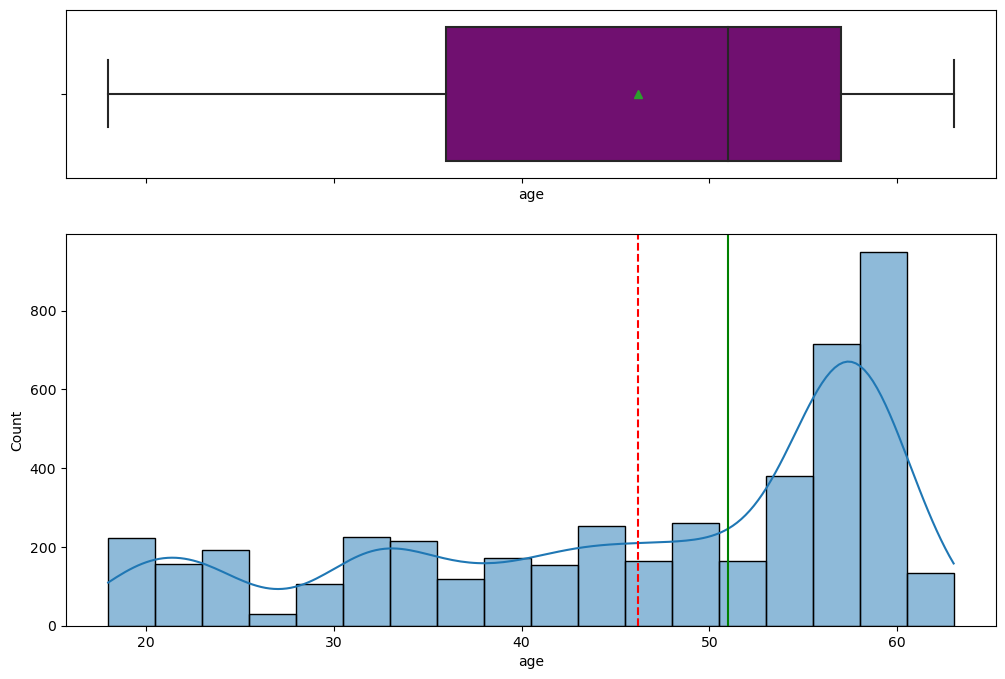

In [12]:
plot_hist_box(copied_data,'age')

### Observation:
* The age distribution is left-skewed, indicating that most of the leads are older, with a majority of them being above 50 years of age.

## WEBSITE_VISITS

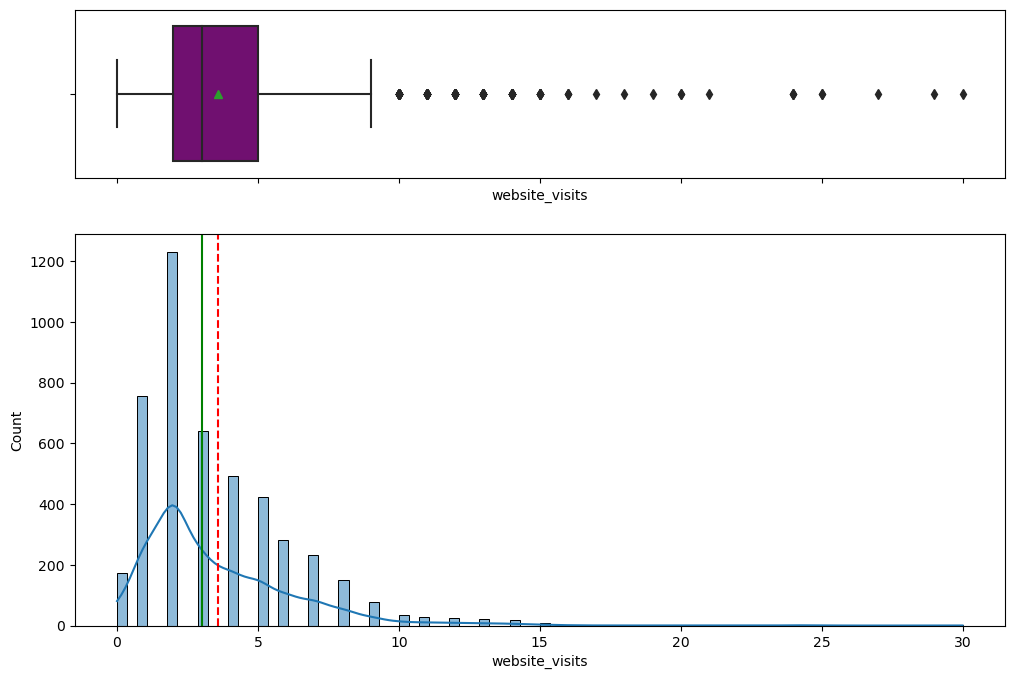

In [13]:
plot_hist_box(copied_data,'website_visits')

### Observation:
* The distribution of website visits exhibits a right-skew, suggesting that there are instances where leads visit the website multiple times. This observation is supported by the presence of outliers in the boxplot. However, it is noteworthy that the majority of leads tend to visit the website at least twice.

## TIME_SPENT_ON_WEBSITE

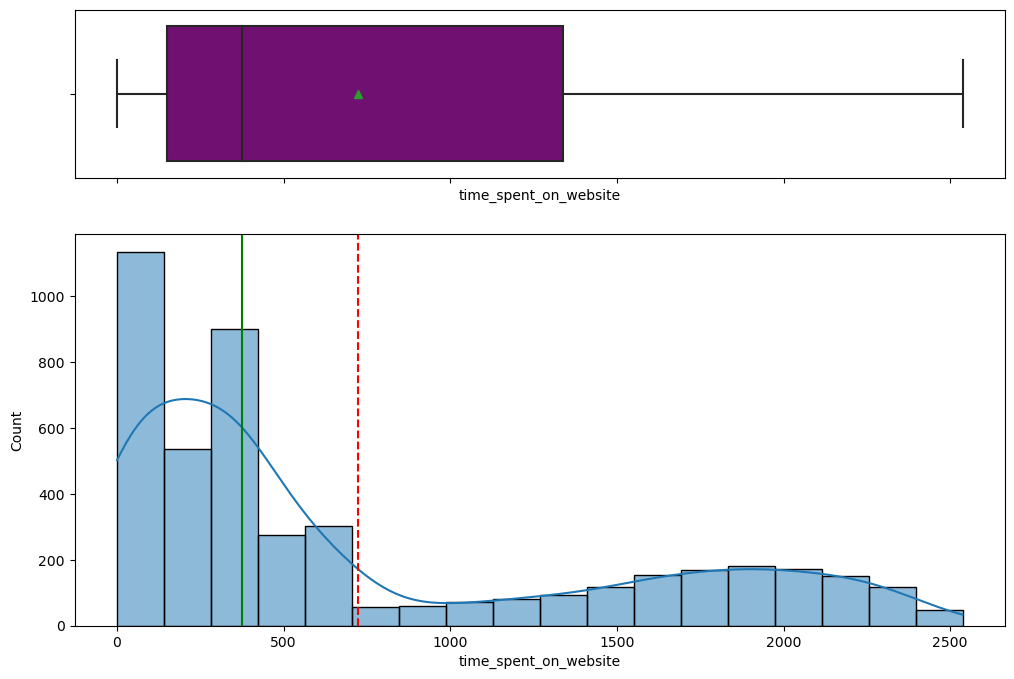

In [14]:
plot_hist_box(copied_data,'time_spent_on_website')

### Observation:
* The distribution of time spent on the website is right-skewed, indicating a varied engagement level among leads. While some leads spend a significant amount of time on the ExtraaLearn website, others show minimal or no engagement at all.

## PAGE_VIEWS_PER_VISIT

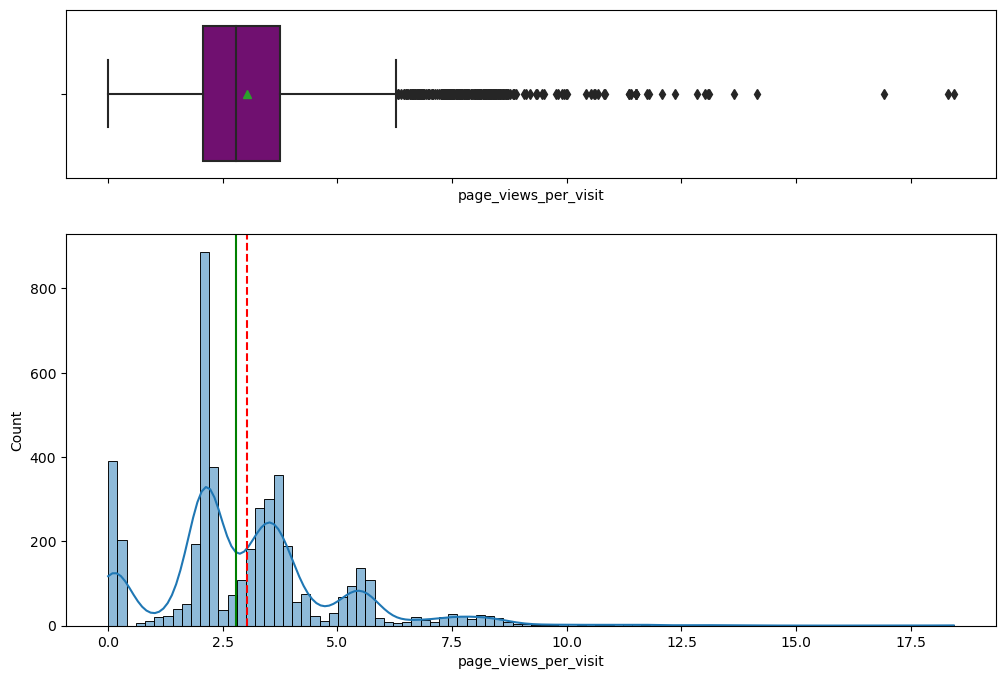

In [15]:
plot_hist_box(copied_data,'page_views_per_visit')

### Observations:
* Page views per visit from leads exhibit a multi-modal distribution, indicating that there are multiple peaks in the frequency of page numbers. The majority of leads tend to visit a relatively small number of pages, typically ranging between 2 and 4. However, there are also leads who explore a significantly higher number of pages, as indicated by the presence of outliers skewed towards the right in the boxplot. These outliers represent leads who engage in extensive browsing on the website, possibly indicating a higher level of interest.

## Univariate analysis of categorical columns

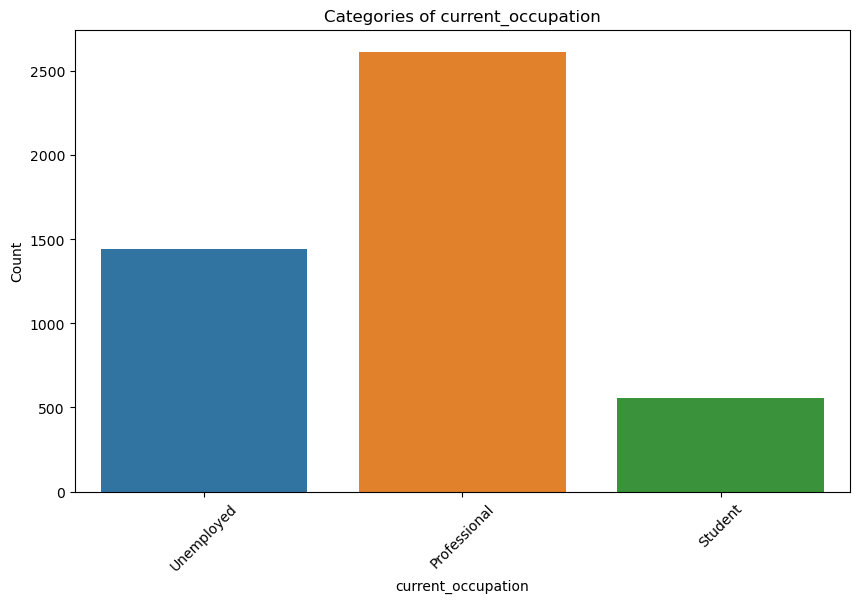

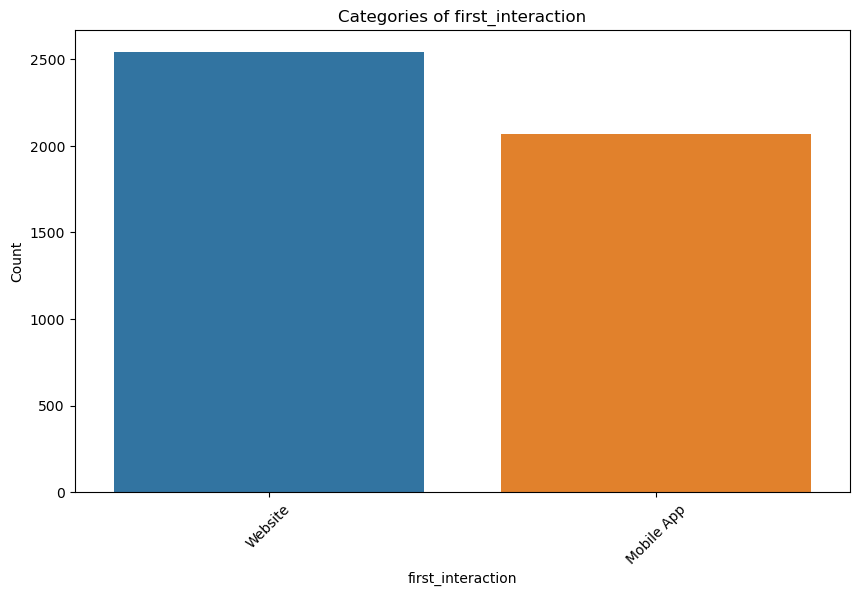

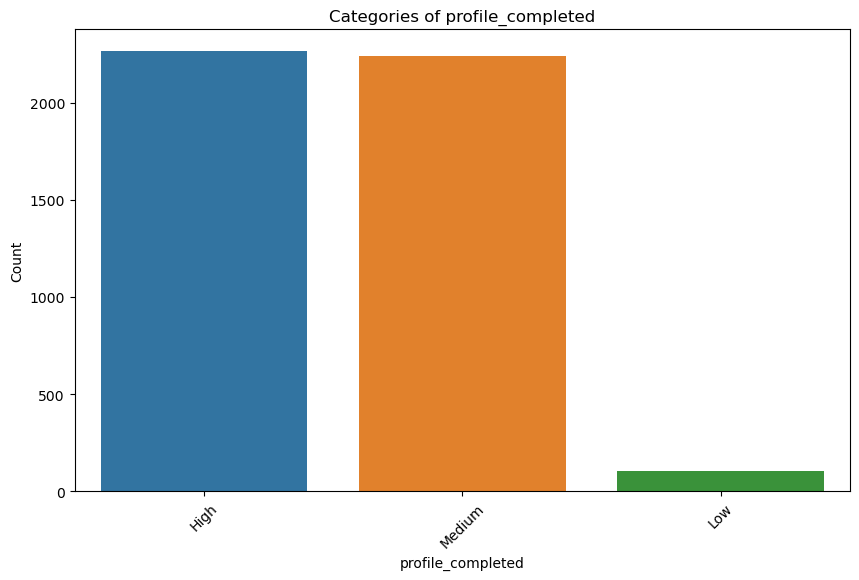

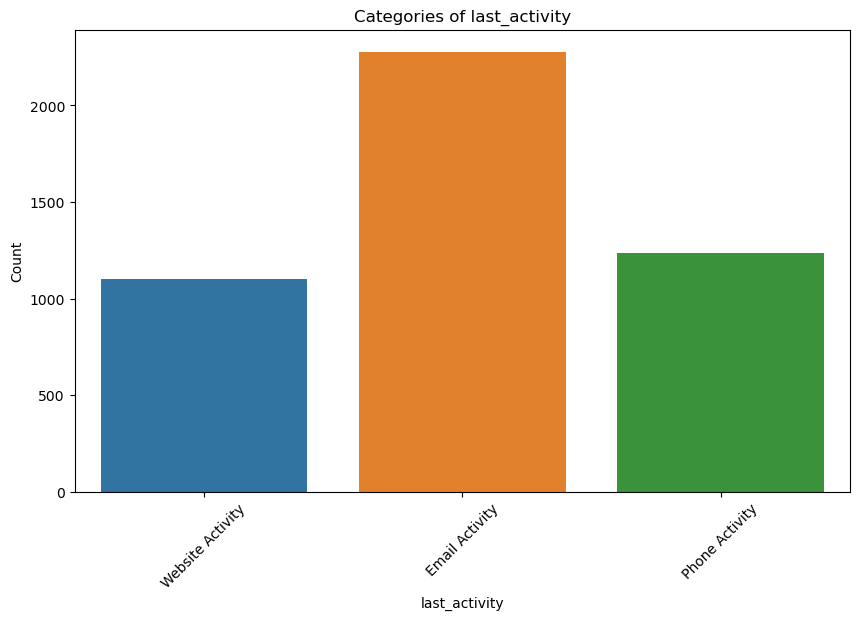

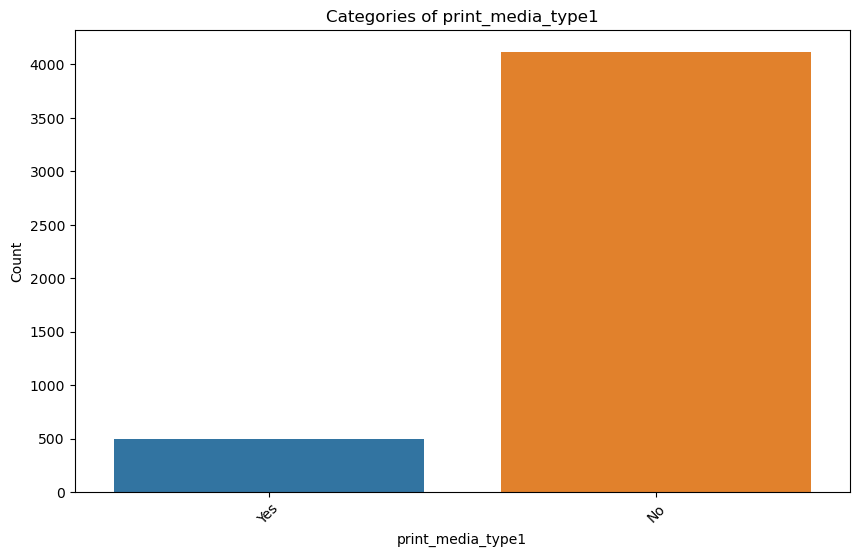

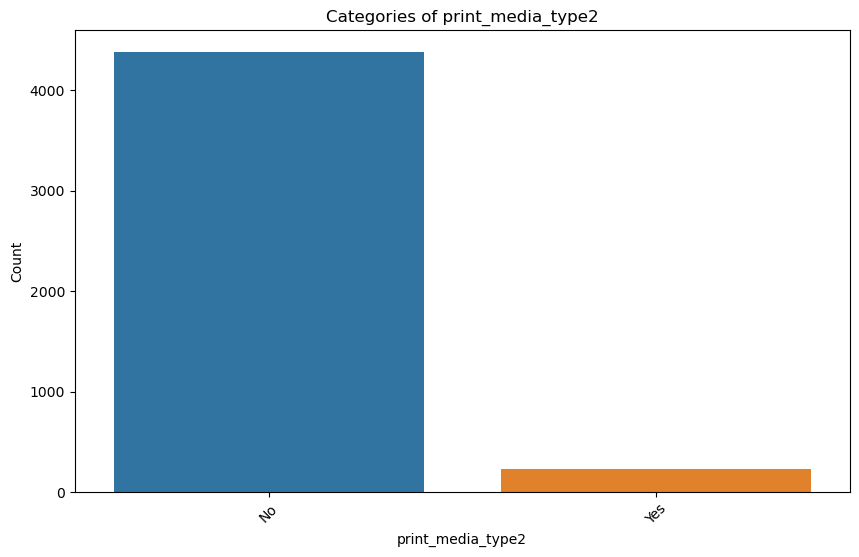

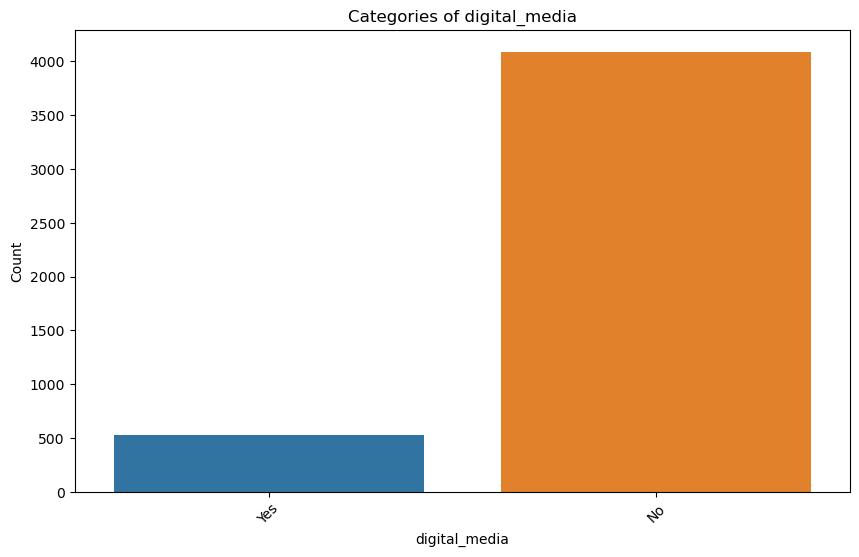

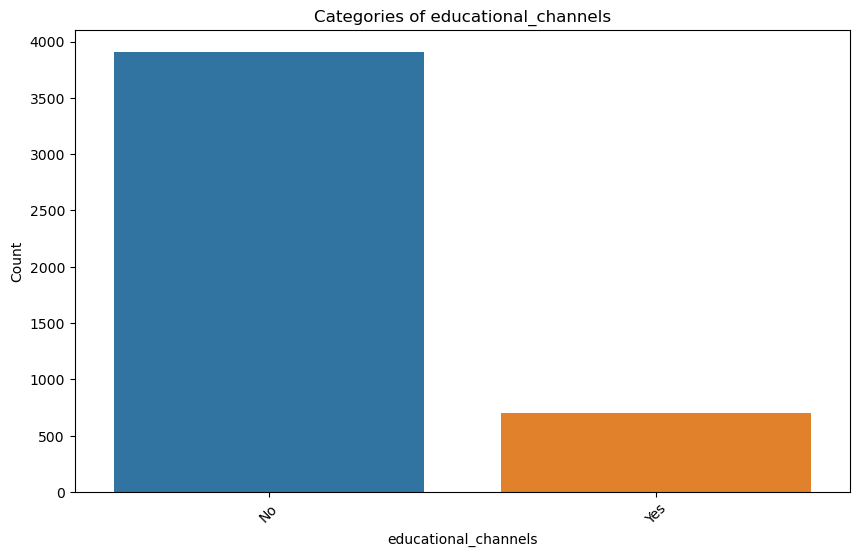

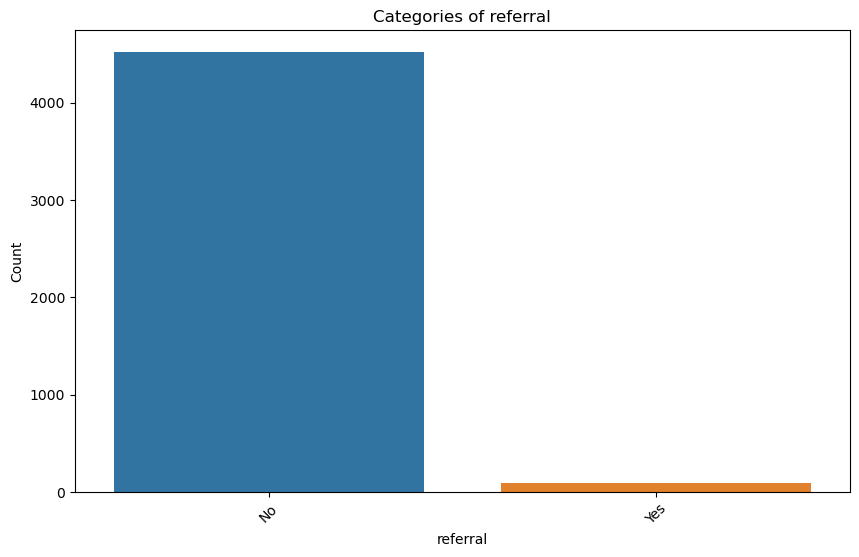

In [16]:
for column in copied_data.columns:
    if copied_data[column].dtype == 'object':
            # If the column is categorical (object type), plot a countplot
            plt.figure(figsize=(10, 6))
            sns.countplot(data=data, x=column)
            plt.title(f'Categories of {column}')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()
        

### Observations:
* The majority of our leads consist of professionals who primarily engage with ExtraaLearn through the website. This initial interaction serves as their introduction to the platform.
* A significant number of the leads have completed 50-100% of their profiles on the website or mobile app. Notably, their most recent interaction with ExtraaLearn occurred through email communication, indicating their strong interest in the program. These individuals actively seek detailed information about the program offerings.
* Furthermore, it is noteworthy that over 90% of leads have not come across ExtraaLearn's advertisements across various channels utilized by the organization. Additionally, there is a significant number of leads who are not familiar with the organization through referrals.

### Status Visualization

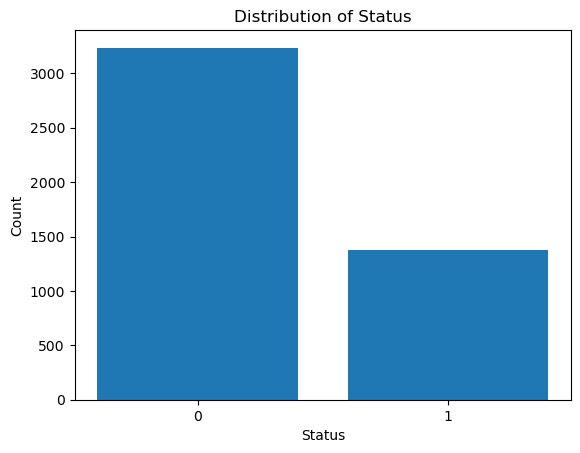

In [17]:
# Count the occurrences of each value in the 'status' column
status_counts = copied_data['status'].value_counts()

# Create a bar plot
plt.bar(status_counts.index, status_counts.values)

# Set the x-axis ticks to only display 0 and 1
plt.xticks([0, 1])

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status')

# Show the plot
plt.show()

### Observation:
* The number of leads who did not convert to paid customers surpasses more than twice the number of leads who successfully converted to paid customers. 

## Bivariate analysis

#### Exploring the relationship between categorial variables and the target variable 

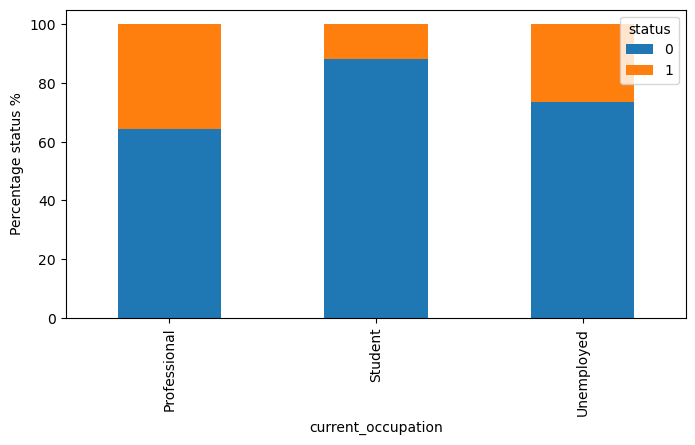

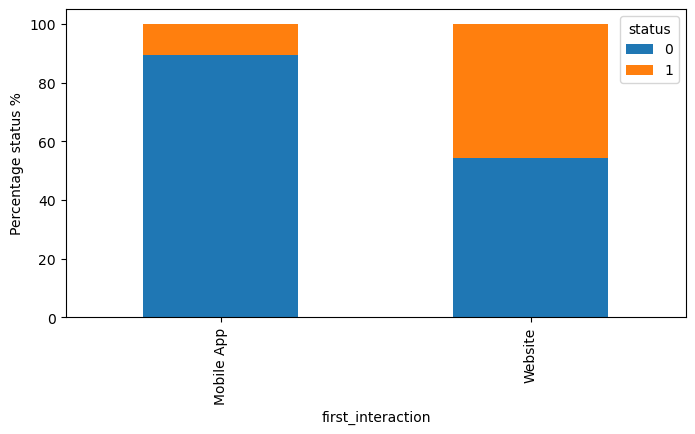

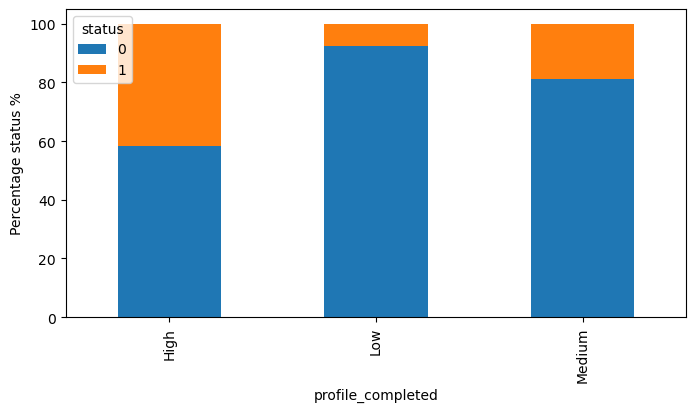

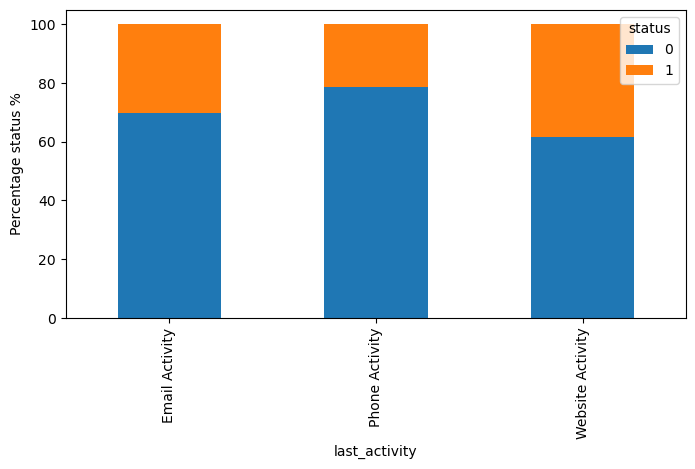

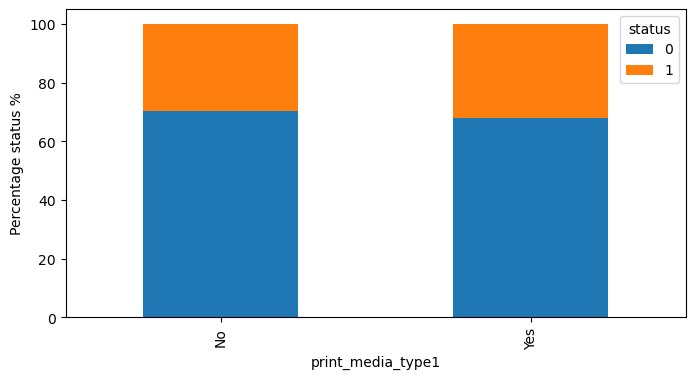

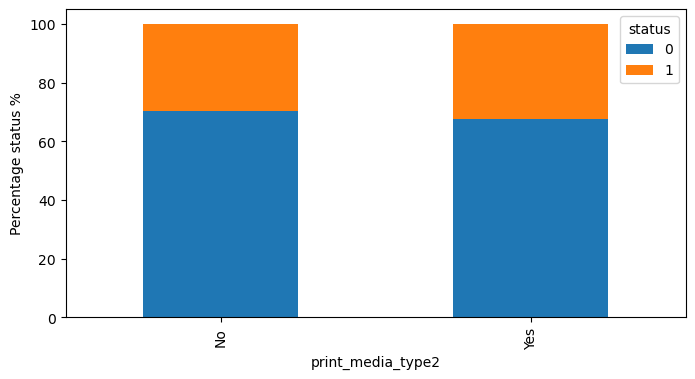

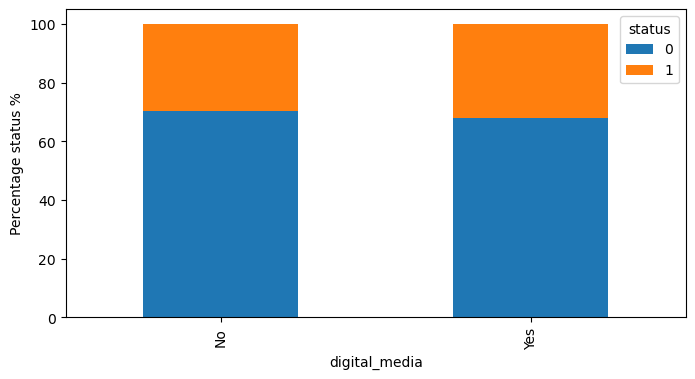

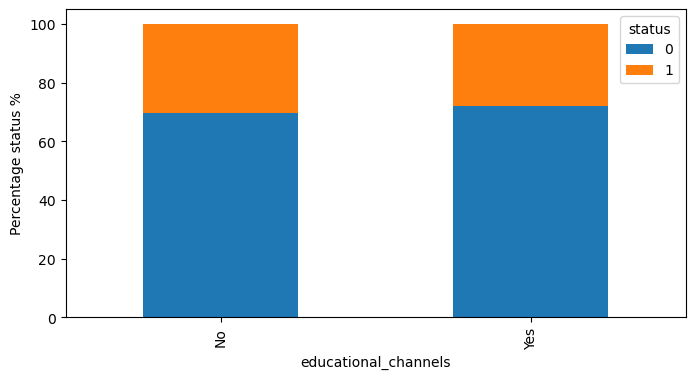

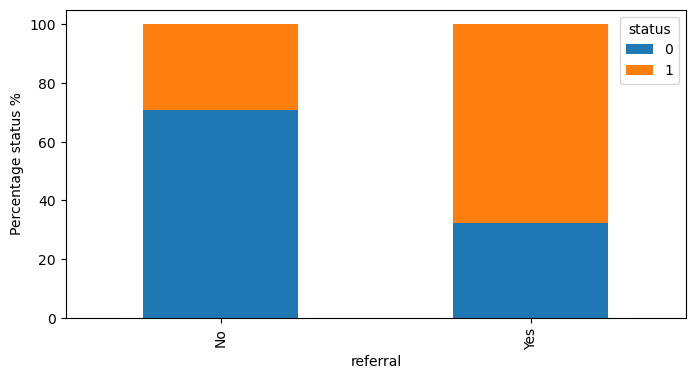

In [18]:
# Specify the target column
target_column = 'status'

# Specify the list of categorical columns
categorical_columns = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Iterate over each categorical column
for column in categorical_columns:
    # Exclude the target column
    if column != target_column:
        # Perform crosstabulation and calculate percentages
        crosstab_data = (pd.crosstab(copied_data[column], copied_data[target_column], normalize='index') * 100)
        
        # Create a stacked bar plot
        crosstab_data.plot(kind='bar', figsize=(8, 4), stacked=True)
        
        # Set the y-axis label
        plt.ylabel('Percentage ' + target_column + ' %')
        
        # Display the plot
        plt.show()

### Observations:
* Among the different current occupation categories, it is noteworthy that approximately 37% of leads who are currently professionals have converted into paid customers. This percentage represents the highest conversion rate, indicating that professionals constitute a significant majority of the leads.
* Over 40% of the leads who initially interacted with ExtraaLearn went on to become paying customers.This implies that the organization's approach to engaging leads during their first interaction with ExtraaLearn has been effective.
* Among the leads who have completed their profiles to a significant extent, specifically between 75-100%, about 41% of them ultimately convert into paid customers. This highlights a good correlation between profile completion and successful conversion.
* Around 40% of the leads who engage in live chat interactions on ExtraaLearn's website end up becoming paid customers.
* The conversion rates of leads to paid customers are nearly identical regardless of whether they have seen ExtraaLearn's advertisements across all mediums. This indicates that the various advertisement channels used by ExtraaLearn do not significantly impact the conversion of leads to paid customers.
* Despite the limited number of leads who discovered ExtraaLearn through referrals, over 70% of them successfully converted into paid customers.

#### Exploring the relationship between numerical variables and the target variable

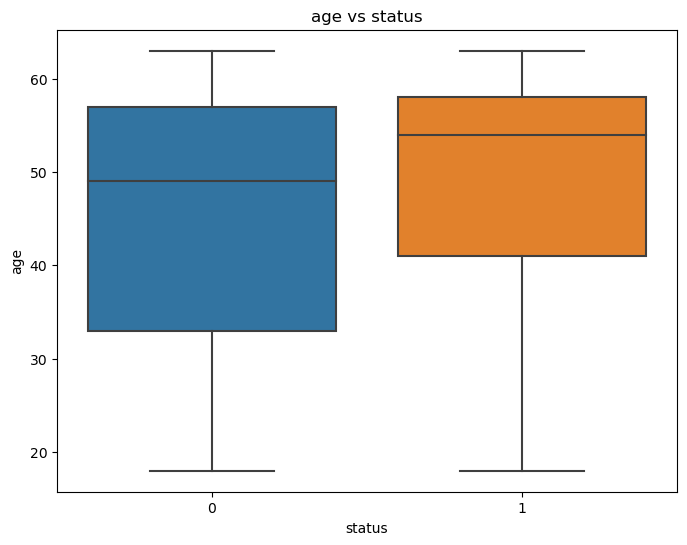

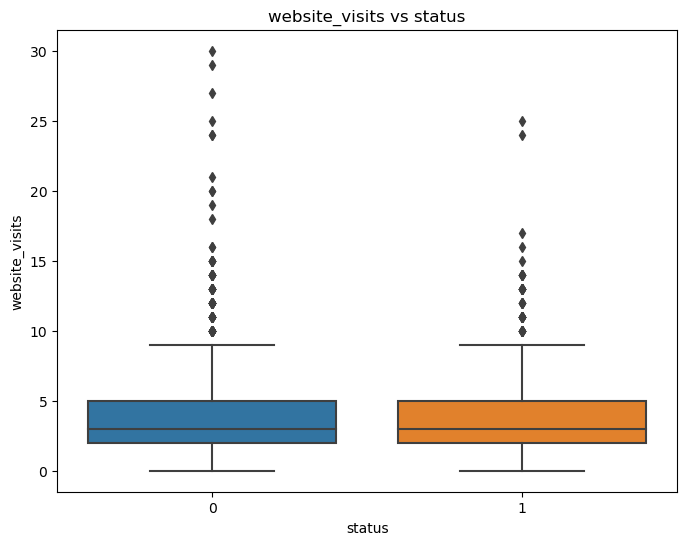

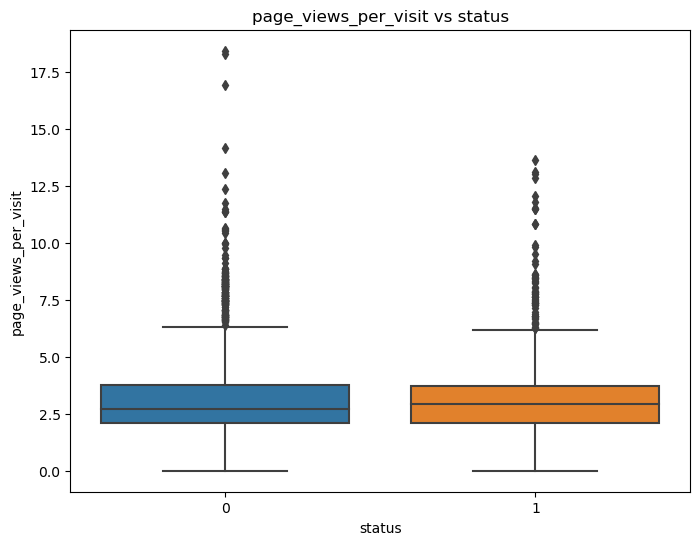

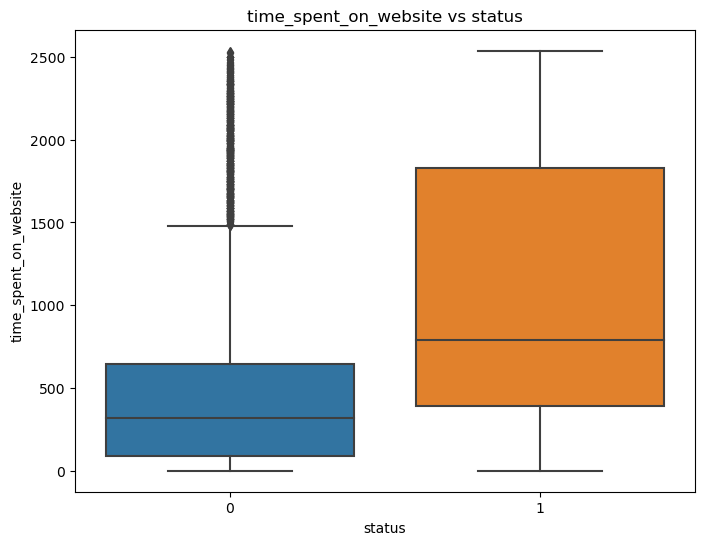

In [19]:
# Assuming 'copied_data' is your dataframe

# Select the numerical columns and the target column
numerical_columns = ['age', 'website_visits', 'page_views_per_visit', 'time_spent_on_website']
target_column = 'status'

# Create box plots for each numerical column with respect to the target column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=target_column, y=column, data=copied_data)
    plt.xlabel(target_column)
    plt.ylabel(column)
    plt.title(f'{column} vs {target_column}')
    plt.show()


### Observations:
* The leads who successfully converted to paid customers exhibit an age distribution predominantly ranging from 41 to 58 years, whereas the leads who did not convert to paid customers display an age distribution mostly ranging from 32 to 58 years.The age distribution pattern highlightS the potential market segment of individuals in their 40s and 50s.
* The average number of website visits is comparable between leads who converted to paid customers and those who did not. However, it is important to acknowledge that both groups contain leads with exceptional website visit numbers. Notably, leads who did not convert to paid customers tend to have a higher proportion of such extreme values in terms of website visits. This trend is also evident in the number of pages viewed per visit.
* Leads who successfully converted to paid customers tend to spend a significant amount of time on the website, typically ranging from 480 to 1800 seconds. This indicates that they dedicate quality time exploring the website and seeking detailed information about the available offerings. However, it's worth noting that there are also leads who spend a considerable amount of time on the website but do not end up becoming paid customers.

#### Exploring the relationship between numerical columns

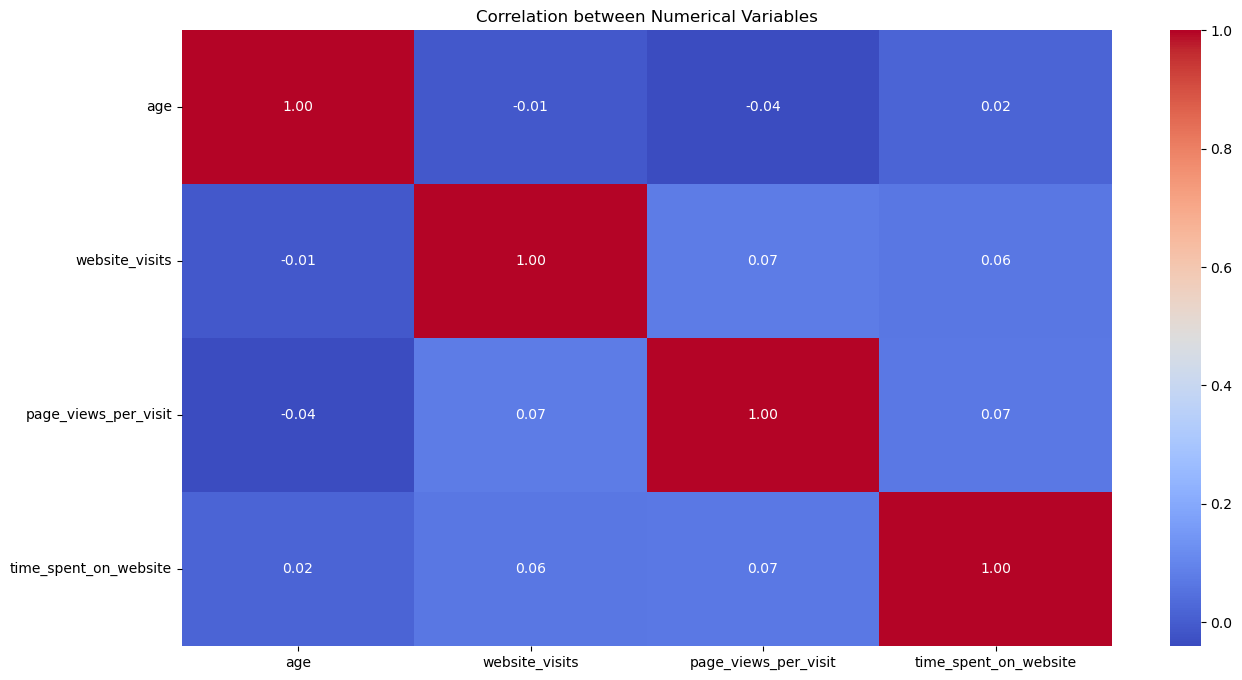

In [20]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15, 8))

# Create a correlation heatmap
sns.heatmap(copied_data[numerical_columns].corr(), annot=True, fmt='0.2f', cmap='coolwarm')

# Add title
plt.title('Correlation between Numerical Variables')

# Display the plot
plt.show()

### Observation:
Based on the correlation coefficients, it is evident that there is no significant correlation observed among the numerical variables.

### Outlier Detection:

Based on the observed boxplots, it is evident that the outliers in the number of website visits and the number of pages viewed per visit exhibit similar patterns for both leads who converted to paid and those who did not. However, concerning the time spent on the website, outliers are only observed among the leads who did not convert to paid customers. Nevertheless, as decision tree and random forest models will be employed for the model building process, it is worth mentioning that these models are generally robust to outliers. However, it is important to note that extreme outliers may still have some impact on decision tree-based models.

### Data Preparation for Model Building

#### Creating dummies for the categorical variables

In [21]:
categorical_columns = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# Create dummy variables for categorical columns
copied_data = pd.get_dummies(data = copied_data, columns = categorical_columns, drop_first = True) 

# Viewing a sample of modified dataframe
copied_data.sample(10)

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
3195,21,7,357,5.217,0,1,0,1,0,1,0,0,0,0,0,0,0
1017,33,1,337,3.336,1,0,0,1,0,0,0,0,0,0,0,1,0
3423,59,3,252,1.985,0,0,0,1,1,0,1,0,0,0,0,0,0
830,34,1,670,1.990,1,0,0,1,0,0,0,1,0,0,0,0,0
2522,32,3,291,2.105,0,0,1,1,0,0,0,0,0,0,0,0,0
1995,59,3,2383,3.081,0,0,1,0,0,0,0,0,1,1,0,0,0
3151,33,1,384,0.179,0,0,0,1,0,1,0,1,0,0,0,0,0
3584,20,5,128,2.199,0,1,0,0,0,1,0,1,0,0,0,0,0
3035,40,4,669,2.139,1,0,0,0,0,1,0,1,0,0,0,0,0
4024,55,6,2215,4.315,1,0,0,1,0,0,0,1,0,0,0,0,0


#### Distinguishing Independent variables and Dependent variables

In [22]:
# Extract the dependent variable 'status'
dependent_var = copied_data.status

# Extract the independent variables by dropping the 'status' column
independent_var = copied_data.drop(columns=['status'])

#### Dividing the data into train and test data sets


It is important to acknowledge the presence of an imbalance in the distribution of the target variable, "status." There are more leads who did not convert to paid customers compared to leads who did convert. Therefore, to mitigate this imbalance, the stratified sampling technique will be employed. This technique ensures that the relative class frequencies are approximately preserved in each train and test fold, allowing for a more representative and unbiased evaluation of the model's performance.

In [23]:
# Splitting the data into training and testing sets
# ind_var_train: independent variable training set
# ind_var_test: independent variable testing set
# dep_train: dependent variable training set
# dep_test: dependent variable testing set
# test_size = 0.3: 30% of the data will be used for testing, while 70% will be used for training

ind_var_train, ind_var_test, dep_train, dep_test = train_test_split(independent_var,dependent_var, test_size = 0.3, random_state = 1, stratify = dependent_var)

### Measures to evaluate model effectiveness

In the case of identifying leads likely to convert to paid customers in ExtraaLearn, both Precision and Recall are important evaluation measures. The more appropriate measure depends on the specific goal, which is to allocate resources effectively by identifying leads more likely to convert.

Precision would be a suitable measure if the focus is on minimizing false positive predictions whiles recall measures the ability of the model to correctly identify all the leads that have actually converted to paid customers.In this case, recall would be more relevant if the goal is to capture as many potential converters as possible, even at the expense of including some false positives. It prioritizes the identification of all leads that are likely to convert, avoiding missed opportunities for conversion. A higher recall value indicates a lower rate of false negatives, ensuring that fewer potential converters are overlooked.

In [24]:
# Creating metric function 
def display_classification_results(actual, predicted):
    """
    Function to print the classification report and display the confusion matrix visually.
    
    Arguments:
    actual -- array-like, true labels of the target variable
    predicted -- array-like, predicted labels of the target variable
    """

    # Print classification report
    print("Classification Report:")
    print(classification_report(actual, predicted))

    # Calculate confusion matrix
    cm = confusion_matrix(actual, predicted)

    # Plot confusion matrix
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='.2f', xticklabels=['Not Paid', 'Paid'], yticklabels=['Not Paid', 'Paid'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [25]:
# Creating a decision tree classifier object with a random state for reproducibility
dt_model = DecisionTreeClassifier(random_state=1)

# Fitting the decision tree model to the training data
# ind_var_train: independent variable training set
# dep_train: dependent variable training set
dt_model.fit(ind_var_train, dep_train)

DecisionTreeClassifier(random_state=1)

#### Checking the performance of the model on the training data

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



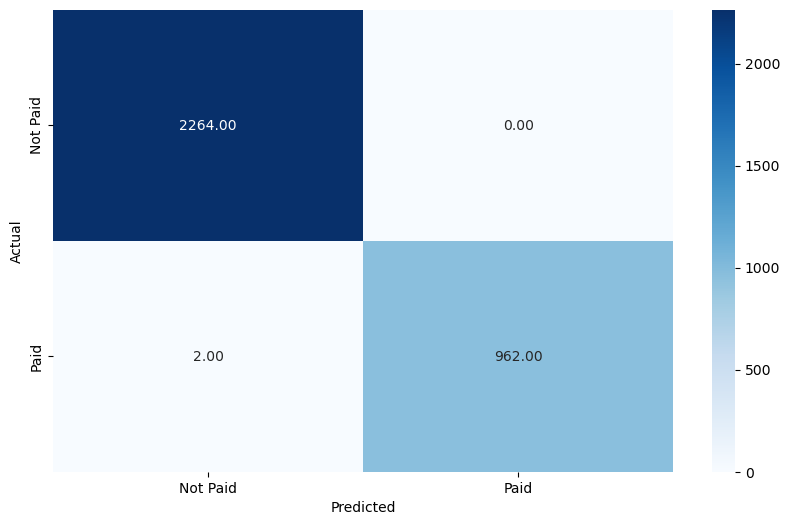

In [26]:
# Predict the labels for the dependent variable training set using the decision tree model
dep_train_predicted_dt_model = dt_model.predict(ind_var_train)

# Display the classification results including the classification report and confusion matrix
display_classification_results(dep_train, dep_train_predicted_dt_model)

### Observation:
The Decision tree is giving a 100% score for all the performance metrics on the training dataset.

#### Assessing the performance of the decision tree model on the test data

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       971
           1       0.68      0.67      0.68       413

    accuracy                           0.81      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384



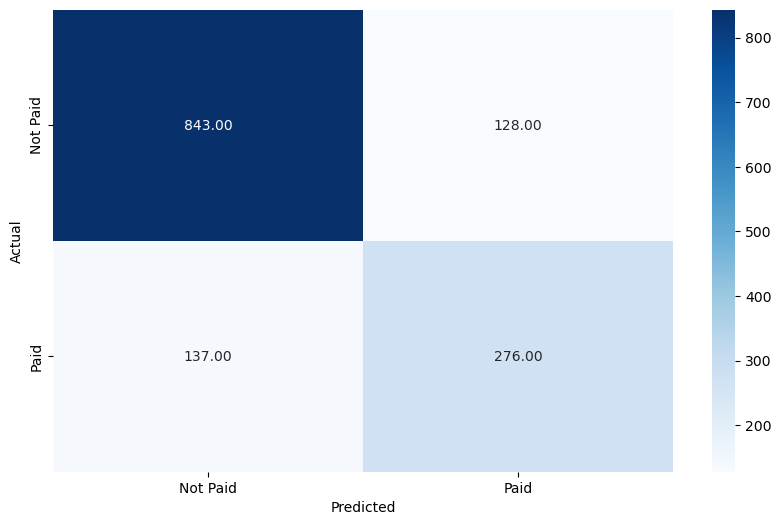

In [27]:
# Predict the labels for the dependent variable test set using the decision tree model
dep_test_predicted_dt_model = dt_model.predict(ind_var_test)

# Display the classification results including the classification report and confusion matrix
display_classification_results(dep_test, dep_test_predicted_dt_model)

### Observations:
* The performance of the decision tree model is favorable on the training data but less satisfactory on the test data, with a recall of 0.67 compared to 1 for the training dataset. This discrepancy suggests that the decision tree model is overfitting the training data.
* Based on the precision score obtained from the test data, it indicates that there is approximately a 32% chance that the model will incorrectly predict that a lead will convert to a paid customer, leading to the allocation of resources to those leads. This suggests that there is a risk of the company wasting their resources on leads that are unlikely to convert.

### Hypertuning the decision tree model
The decision tree model is exhibiting overfitting on the training data. To address this issue, hyperparameters will be utilized to tune the model, aiming to mitigate overfitting and improve generalization performance.

In [28]:
# To check the distribution of the target variable status which will aid in tuning of the decision tree model
print(copied_data['status'].value_counts(normalize=True))

0   0.701
1   0.299
Name: status, dtype: float64


In [29]:
# Create a decision tree classifier with specified class weights and random state
# class_weight = {0: 0.3, 1: 0.7} assigns higher weight to class 1 (Paid) to address class imbalance
dtree_estimator = DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

# Define the parameter grid for hyperparameter tuning
param = {'max_depth': np.arange(2, 8), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [5, 10, 20, 25]}

# Define the metric used for scoring during grid search
# In this case, recall_score is used as the metric with positive label as 1 (Paid)
metric_used = make_scorer(recall_score, pos_label=1)

# Perform grid search using cross-validation
# cv = 6 specifies 6-fold cross-validation
grid_search = GridSearchCV(dtree_estimator, param, scoring=metric_used, cv=6)

# Fit the grid search to the training data
grid_search = grid_search.fit(ind_var_train, dep_train)

# Retrieve the best estimator from the grid search
dt_tuned_model = grid_search.best_estimator_

# Fit the tuned decision tree model to the training data
dt_tuned_model.fit(ind_var_train, dep_train)


DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=1)

#### Checking the performance of the tuned decision tree model on train data

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



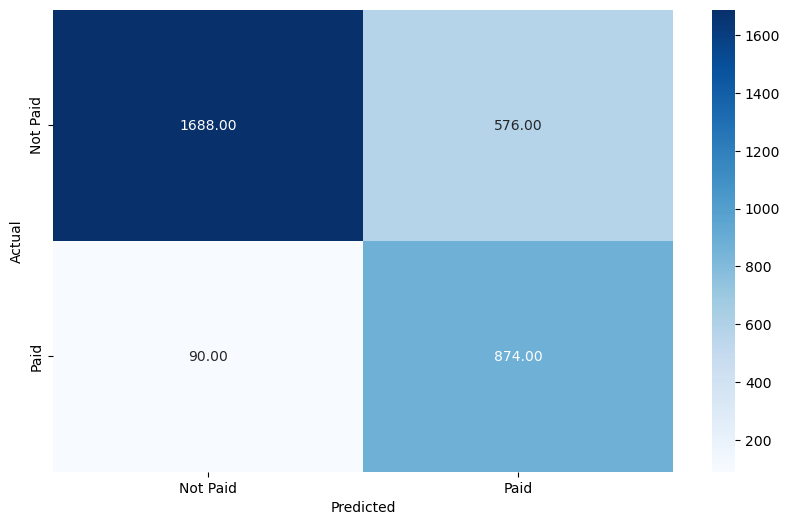

In [30]:
# Predict the labels for the dependent variable training set using the tuned decision tree model
dep_train_predicted_dt_tuned_model = dt_tuned_model.predict(ind_var_train)

# Display the classification results including the classification report and confusion matrix
display_classification_results(dep_train, dep_train_predicted_dt_tuned_model)


### Observations: 
In comparison to the model with default hyperparameter values, the performance on the training set has decreased. This outcome is expected as we aim to mitigate overfitting by adjusting the hyperparameters.

#### Checking the performance of the tuned decision tree model on test data

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



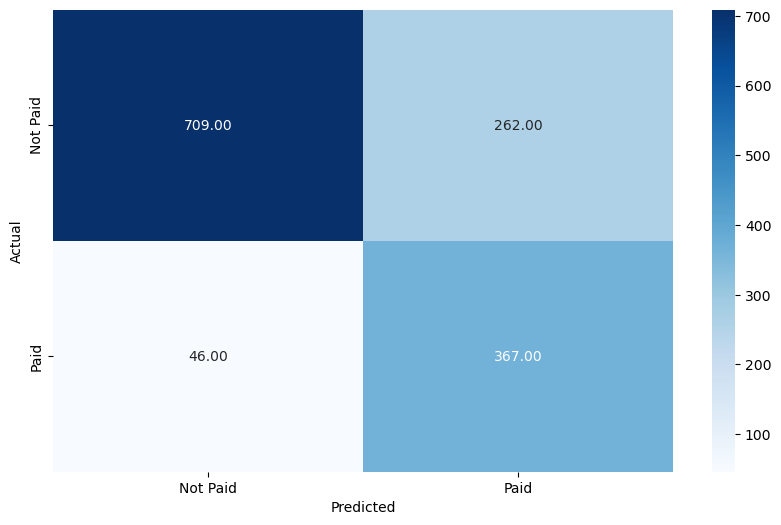

In [31]:
# Predict the labels for the dependent variable test set using the tuned decision tree model
dep_test_predicted_dt_tuned_model = dt_tuned_model.predict(ind_var_test)

# Display the classification results including the classification report and confusion matrix
display_classification_results(dep_test, dep_test_predicted_dt_tuned_model)


### Observation:
* The tuned decision tree model exhibits an improved recall score of 0.89, surpassing the default decision tree model with a score of 0.67. However, it is important to note that the precision and accuracy scores have decreased to 0.58 and 0.78, respectively, for the tuned decision tree model. This is good since maximizing recall as much as possible is the objective of this analysis.

### Visual representation of the tuned decision tree

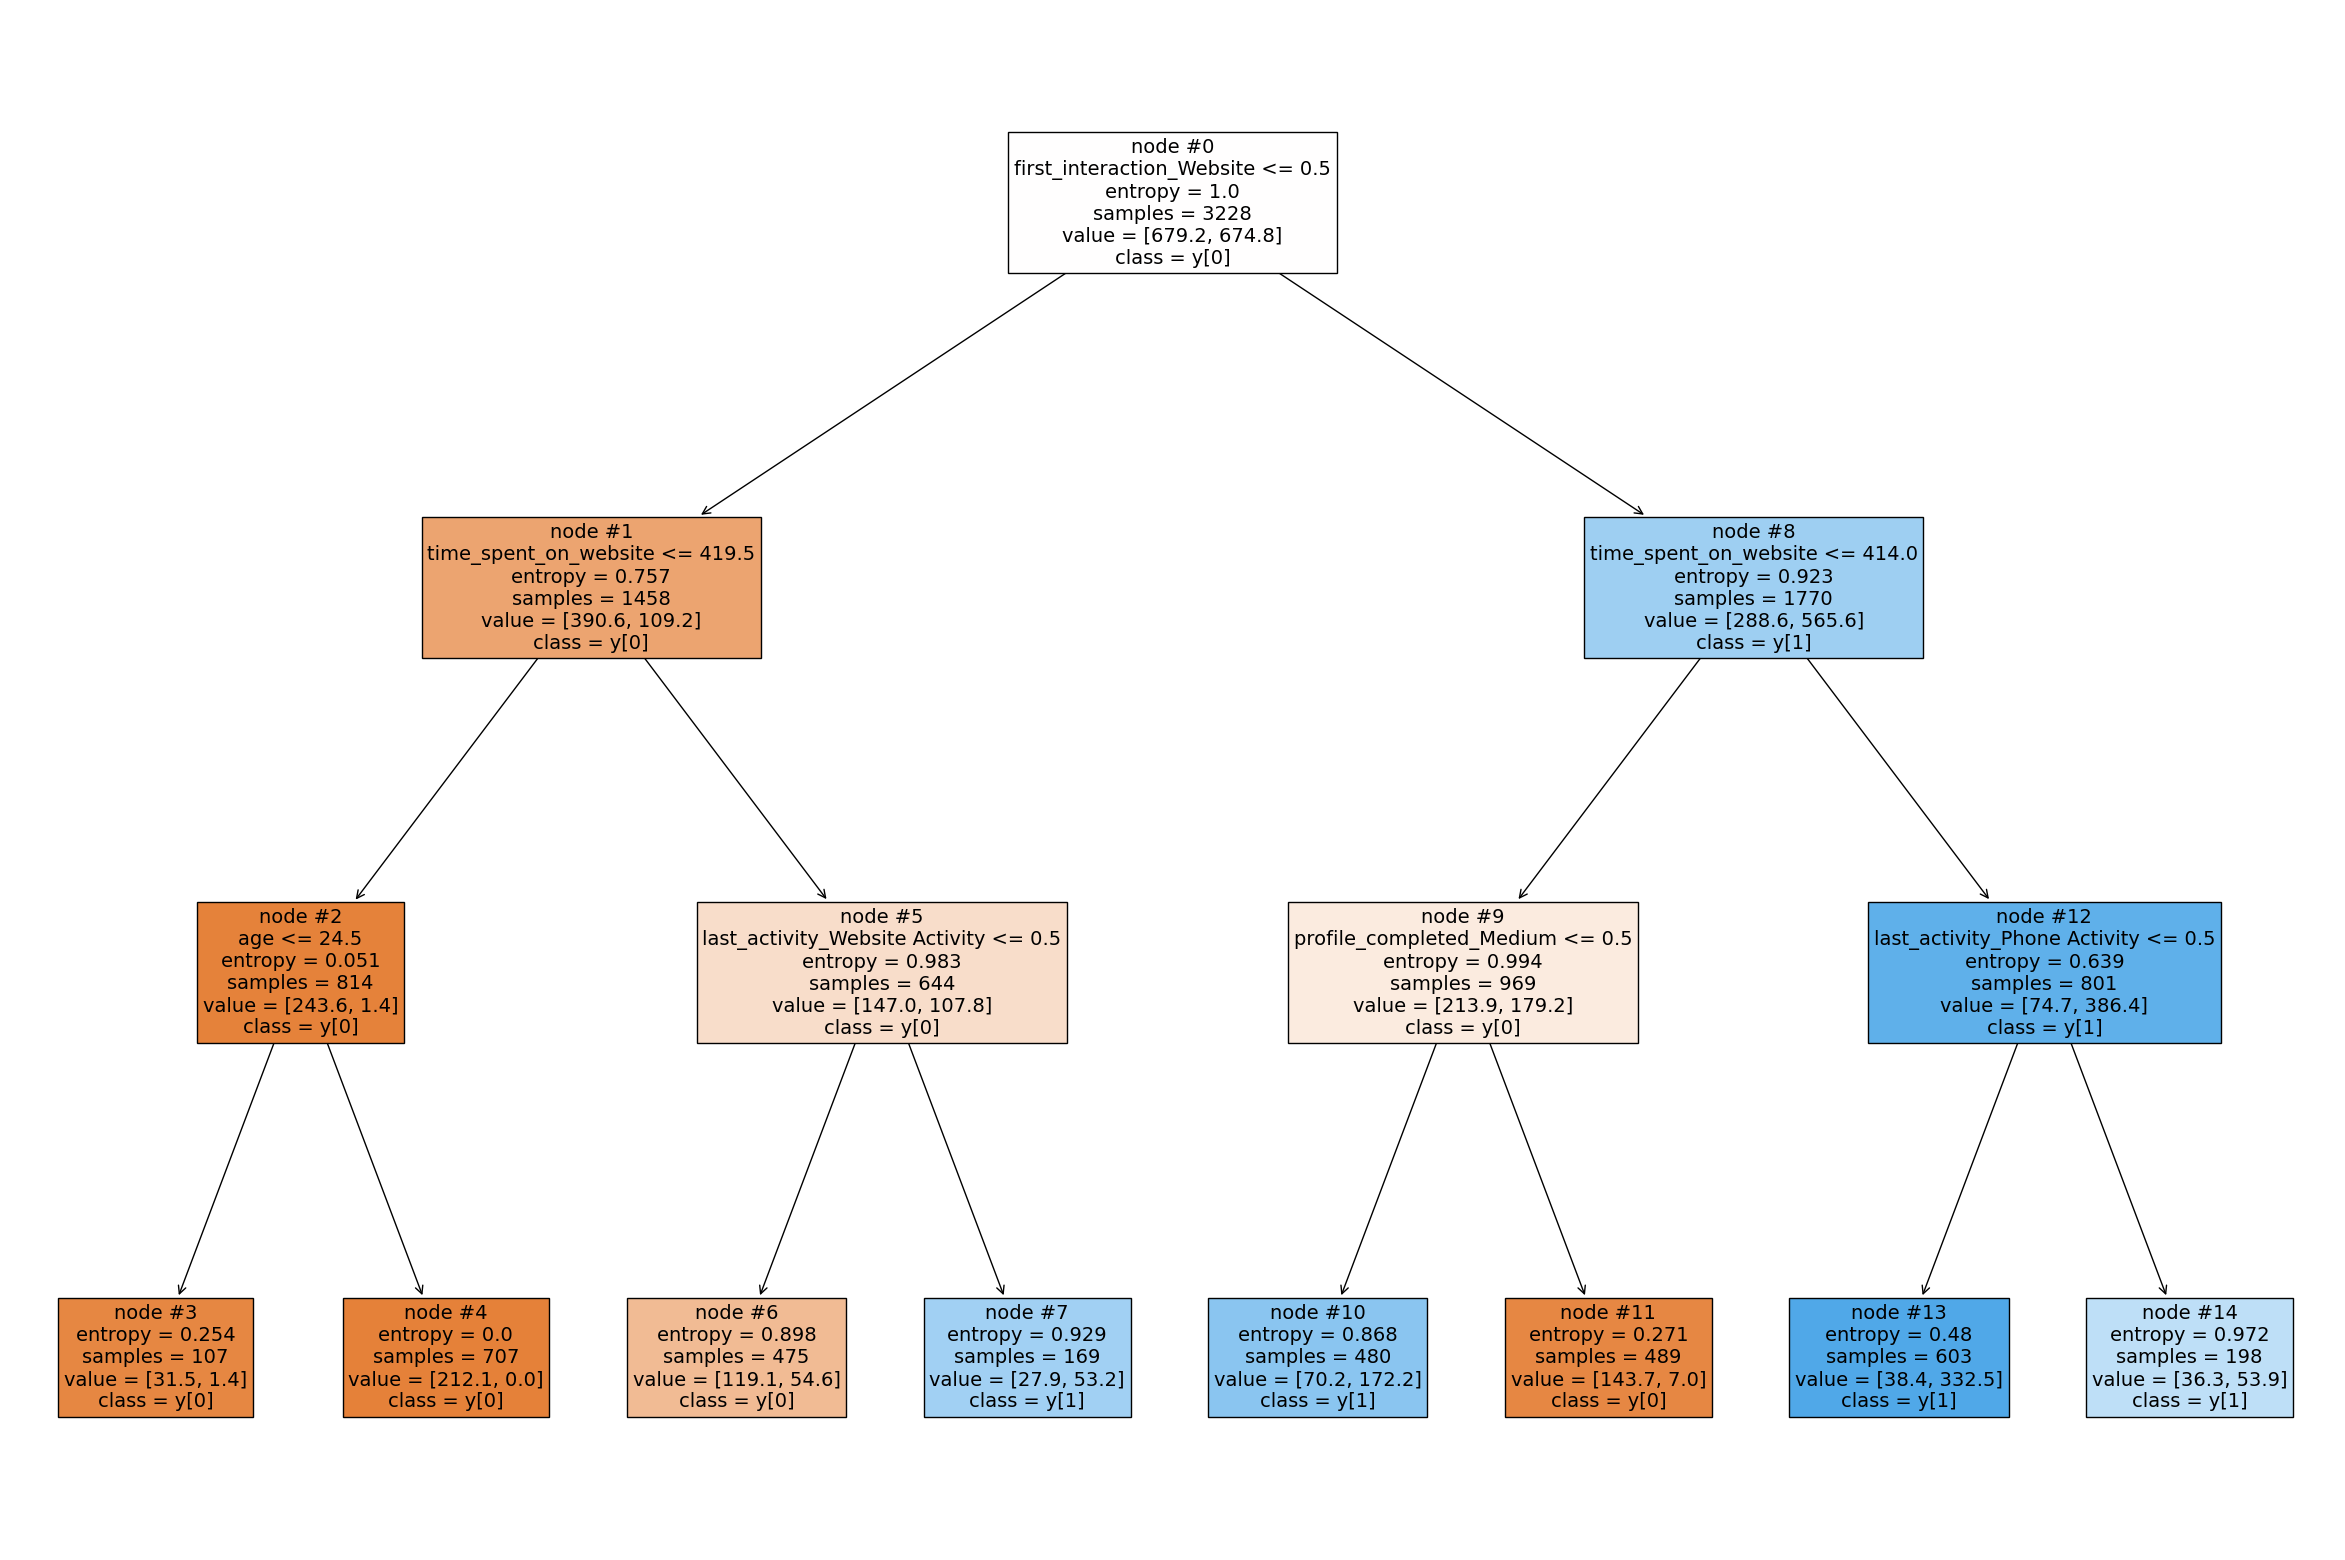

In [32]:
# 'independent_var' is the dataframe containing the independent variables
# 'dt_tuned_model' is the tuned decision tree model

# Get the list of column names from the independent variable dataframe
columns = list(independent_var.columns)

# Create a large figure to display the decision tree
plt.figure(figsize=(30, 20))

# Plot the decision tree using the 'plot_tree' function from the 'tree' module
tree.plot_tree(dt_tuned_model, feature_names=columns, filled=True, fontsize=14, node_ids=True, class_names=True)

# Display the plot of the decision tree
plt.show()


### Observations:
* The blue leaves in the decision tree represent leads that have converted to paid customers, indicated by the label y[1]. On the other hand, the orange leaves represent leads that have not converted to paid customers, indicated by the label y[0].
* According to the decision tree analysis, it is found that the last interaction between the lead and ExtraaLearn through phone activity has a strong association with lead conversion to paid customers. Additionally, leads who have completed between 50-75% of their profiles are more likely to convert. Moreover, leads whose last interaction is via website activity also show a higher likelihood of conversion to paid customers. These findings align with the patterns observed in the distribution of the original data.

#### Exploring the important features of the tuned decision tree

<Axes: xlabel='Importance'>

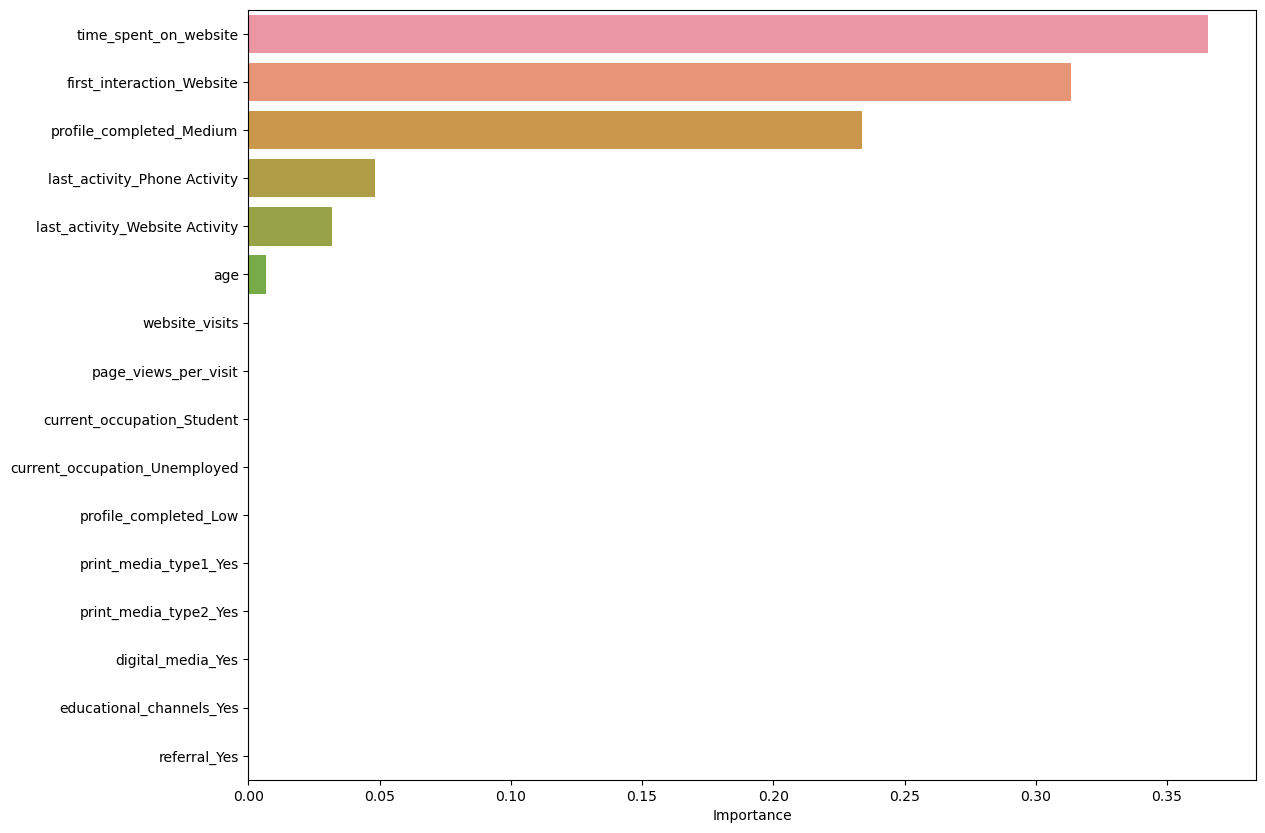

In [33]:
# Extract the feature importances from the tuned decision tree model
important_features = dt_tuned_model.feature_importances_

# Get the column names of the independent variables
columns = independent_var.columns

# Create a dataframe to store the feature importances
importance_df = pd.DataFrame(important_features, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Plotting the feature importances using a bar plot
plt.figure(figsize=(13, 10))
sns.barplot(x=importance_df.Importance, y=importance_df.index)

### Observations:
The tuned decision tree model assigns importance to a selected set of five features, as illustrated in the graph. Among these features, "time_spent_website" has the highest importance, followed by "first_interaction_website", "profile_completed_medium", "last_activity_Phone_activity", and "last_activity_website activity". This suggests that the interaction between the lead and a representative is crucial in converting leads to paid customers. Additionally, the importance placed on the lead's age is relatively lower compared to the other factors. Overall, these findings emphasize the significance of effective lead engagement and highlight the importance of fostering meaningful interactions with potential customers to increase conversion rates.

## Building a Random Forest model

In [34]:
# Creating a random forest classifier object with a random state for reproducibility
rf_model_estimator = RandomForestClassifier(random_state=1)

# Fitting the random forest model to the training data
# ind_var_train: independent variable training set
# dep_train: dependent variable training set
rf_model_estimator.fit(ind_var_train, dep_train)

RandomForestClassifier(random_state=1)

#### Assessing the performance of the random forest model on the train data

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



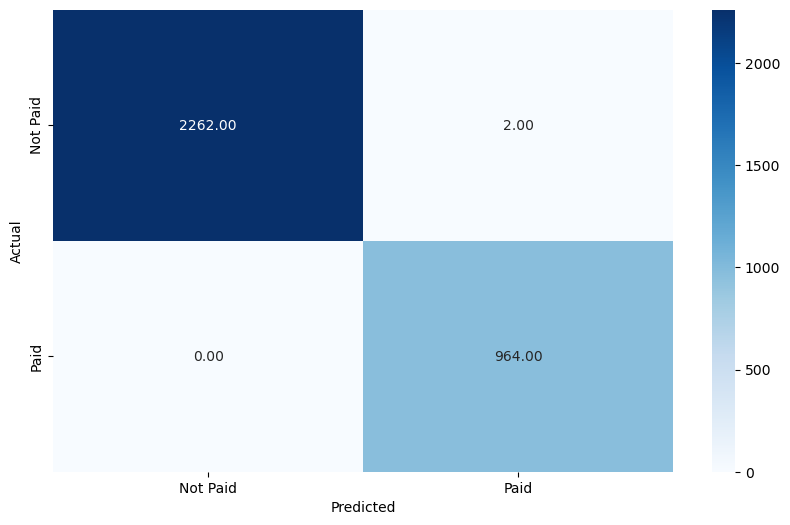

In [35]:
# Predict the labels for the dependent variable training set using the random forest model
dep_pred_train_rf = rf_model_estimator.predict(ind_var_train)

# Display the classification results including the classification report and confusion matrix
display_classification_results(dep_train, dep_pred_train_rf)

### Observations: 
The Random Forest model achieves a perfect score of 100% for all metrics on the training dataset.

#### Assessing the performance of the random forest model on the test data

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.73      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



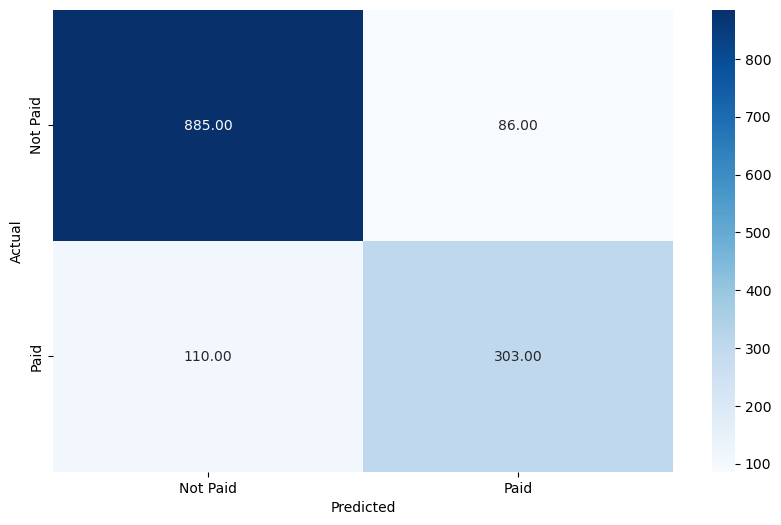

In [36]:
# Predict the labels for the dependent variable testing set using the random forest model
dep_pred_test_rf = rf_model_estimator.predict(ind_var_test)

# Display the classification results including the classification report and confusion matrix
display_classification_results(dep_test, dep_pred_test_rf)

### Observations:
The Random Forest model appears to be overfitting the training data. This is evident from the recall score, which is 1 on the training data, but drops to approximately 0.73 for class 1 on the test data. Furthermore, the precision and accuracy scores on the test data are below 1, whereas they are both 1 on the training data. These discrepancies suggest that the model is not generalizing well to unseen data, indicating a potential issue with overfitting.

### Hypertuning the Random Forest Model

It appears that the random forest model is exhibiting signs of overfitting. By utilizing appropriate hyperparameters, it is possible to mitigate this issue and improve the model's generalization performance.

In [37]:
# Create a random forest classifier with class weights assigned to the target variable
# Setting class_weight = {0: 0.3, 1: 0.7} assigns higher weight to class 1 (Paid) to address class imbalance
rf_tuned_model_estimator = RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

# Define the parameter grid for tuning the random forest classifier
param_rf = {
    "n_estimators": [100, 200],
    "min_samples_leaf": [5, 10, 20, 25],
    "max_features": [0.7, 0.9],
    "max_depth": np.arange(2, 8)
}

# Define the metric for scoring the grid search results
metric_rf = metrics.make_scorer(recall_score, pos_label=1)

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rf_tuned_model_estimator, param_rf, scoring=metric_rf, cv=6)
grid_search = grid_search.fit(ind_var_train, dep_train)

# Assign the best estimator found by grid search to the random forest model
rf_tuned_model_estimator = grid_search.best_estimator_

In [38]:
# Fit the random forest model with tuned hyperparameters to the training data
rf_tuned_model_estimator.fit(ind_var_train, dep_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       max_features=0.9, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

#### Checking the performance of the tuned random forest model on train data

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



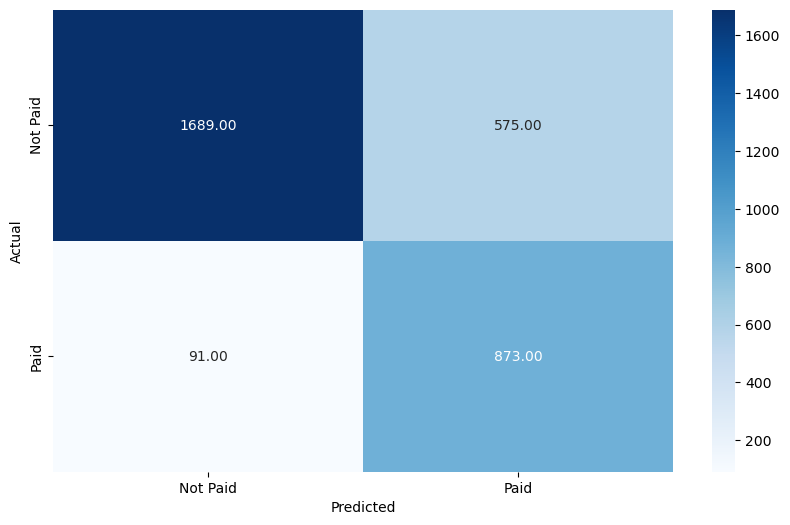

In [39]:
# Predict the labels for the dependent variable training set using the tuned random forest model
rf_tuned_model_pred = rf_tuned_model_estimator.predict(ind_var_train)

# Display the classification results including the classification report and confusion matrix for the test set
display_classification_results(dep_train, rf_tuned_model_pred)

#### Checking the performance of the tuned random forest model on test data

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.71       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



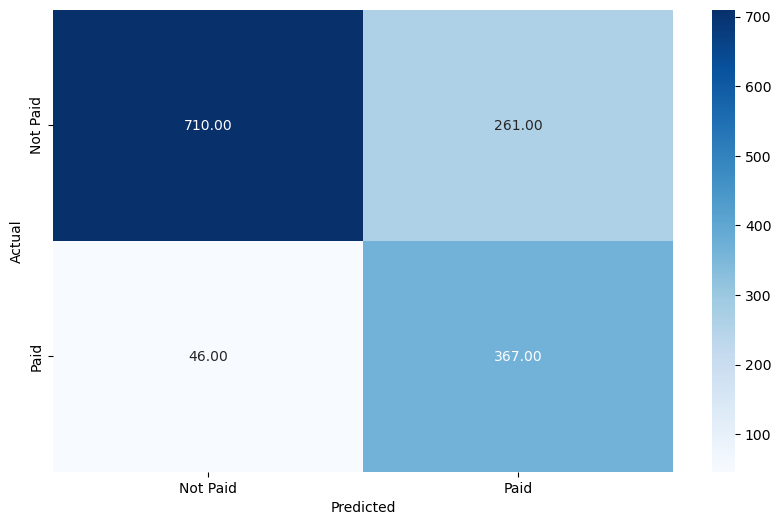

In [40]:
# Predict the labels for the dependent variable testing set using the tuned random forest model
rf_tuned_model_pred_test = rf_tuned_model_estimator.predict(ind_var_test)

# Display the classification results including the classification report and confusion matrix for the test set
display_classification_results(dep_test, rf_tuned_model_pred_test)

### Observations:
* The performance on the training set has shown a decrease when using the tuned random forest model compared to the default hyperparameters. This result can be expected as the purpose of adjusting the hyperparameters is to address overfitting.
* The performance on the test data demonstrates favorable results. Notably, there is an improvement in both recall and precision for class 1, although with a slight decrease. This indicates that the tuned random forest model is better with unseen data.

#### Exploring the important features of the tuned random forest model

<Axes: xlabel='Importance'>

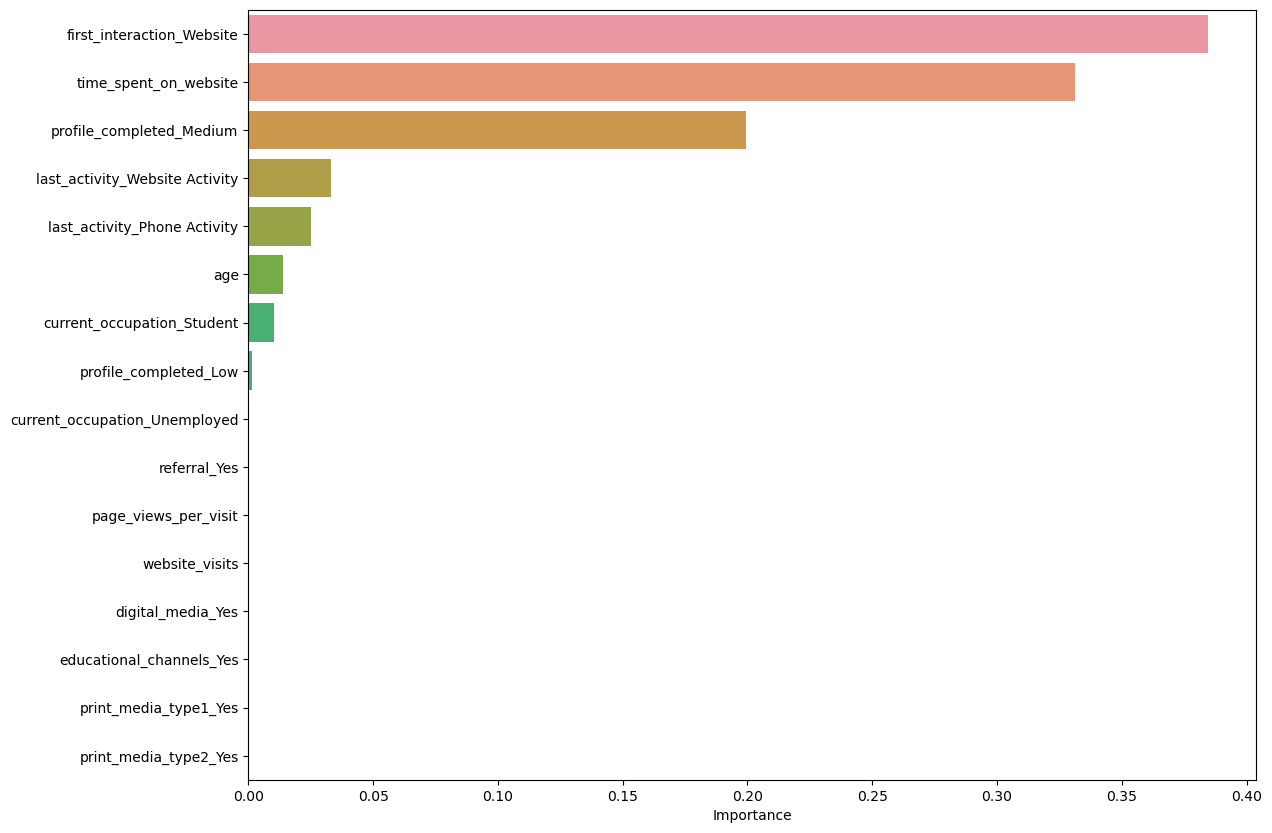

In [41]:
# Extract the feature importances from the tuned random forest model
important_features = rf_tuned_model_estimator.feature_importances_

# Get the column names of the independent variables
columns = independent_var.columns

# Create a dataframe to store the feature importances
importance_df = pd.DataFrame(important_features, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Plotting the feature importances using a bar plot
plt.figure(figsize=(13, 10))
sns.barplot(x=importance_df.Importance, y=importance_df.index)

### Observations:
* The feature importance of the tuned random forest model closely aligns with the important features of the tuned decision tree model. In addition to the existing important features, the tuned random forest model identifies "current_occupation_student" and "profile_completed_low" as new significant features. These two features contribute significantly to the model's predictions.


## Conclusion and Recommendations

### Conclusions:
* The default hyperparameters for both the decision tree and random forest models were found to be overfitting the training data, resulting in poor performance when applied to the test data.
* The tuned decision tree and random forest models exhibited strong performance on the test data, with a slight reduction in precision and recall compared to their respective untuned versions. Both tuned models achieved a commendable recall score of 0.89, indicating their effectiveness in identifying potential leads who are likely to convert into paid customers. This outcome aligns with the objective of constructing a model that captures as many potential converters as possible.
* Hence, to enhance the model's robustness, ExtraaLearn has the option to fine-tune both the decision tree and random forest models further in order to increase the recall score. This would prioritize capturing a higher proportion of actual positive instances, ensuring that fewer potential converters are overlooked. 


### Recommendations:
* Based on the obtained results, it is clear that the initial interaction between a lead and a representative of ExtraaLearn plays a vital role in converting the lead into a paid customer.ExtraaLearn can enhance the first interaction experience, build trust, and increase the chances of converting leads into paid customers.They can continuously monitor and analyze the outcomes to further refine and optimize the process for maximum conversion success.
* To capitalize on the likelihood of conversion among leads who have completed their profiles between 50-100%, ExtraaLearn can implement the following strategies to increase the conversion rate:Exclusive Benefits for Completed Profiles,Proactive Engagement, Streamlined Profile Completion Process and Personalized Recommendations. By leveraging on these, ExtraaLearn can effectively engage and motivate these leads to convert into paid customers.
* The current occupation of leads plays a significant role in the conversion rate to paid customers. It has been observed that leads who are professionals are more inclined to convert to paid customers. ExtraaLearn can develop targeted marketing campaigns specifically designed for professionals,foster a sense of community and professional networking among leads who are professionals and develop specialized programs tailored to the needs of professionals.
* It is important to acknowledge that a significant proportion of the leads have not referred others to ExtraaLearn. To tap into the potential of referrals, ExtraaLearn can encourage professionals who have benefited from their programs to share their positive experiences and provide testimonials. By leveraging these testimonials and word-of-mouth recommendations, ExtraaLearn can establish trust and credibility, which can attract more professionals to convert. Additionally, implementing referral programs or offering incentives can further motivate professionals to refer their peers and colleagues to ExtraaLearn.
* The lack of significant impact from advertisement channels on the conversion of leads to paid customers suggests that ExtraaLearn's marketing efforts may not effectively reach with the target audience. To address this, the firm can optimize its advertising strategies by refining targeting, developing customer personas, and reallocating resources to the most effective channels.
* Furthermore, it has been observed that leads within the age range of 40-50 years are more inclined to convert into paid customers. To maximize conversion rates among leads aged 40-50, ExtraaLearn can employ targeted messaging and customized program offerings tailored to this age group's needs. Emphasizing the relevance and value of their programs, sharing testimonials and success stories, and engaging with industry associations can help build credibility and inspire conversions. Personalized support, clear information, and guidance throughout the customer journey can further enhance the conversion process.